<a href="https://colab.research.google.com/github/Viktory4121/MM/blob/main/IDZ1_MM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ИДЗ 1. Математическое моделирование.
### Вариант 11.


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [103]:
t = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

#x'(t) значения
x_ = [7.136746784, 9.737908047, 13.72630457, 19.37279192, 
      27.85057529, 40.2175683, 59.13442703, 87.4633073, 
      130.1576377, 193.7794096, 289.4217596]
m = 2.0
n = 0.0
p = 4.0
q = 2.0
r = 2.0

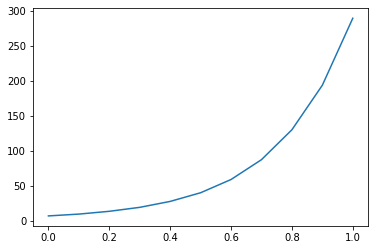

In [104]:
#График значений x'
plt.plot(t, x_)

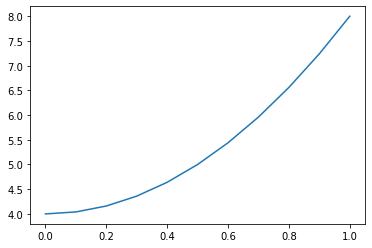

In [105]:
#Поиск значений функции f(t)
def f(tt):
  return (p * (tt**m) + q * (tt**n) + r)

f_t = []
for i in t:
  f_t.append(f(i))

plt.plot(t, f_t)

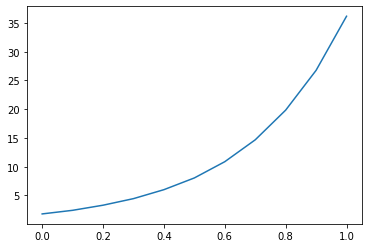

In [106]:
#k(t) теоретическое
k_t = []
for i in range(len(t)):
  k_t.append(x_[i]/f_t[i])

plt.plot(t, k_t)

### Предположим, что k(t) имеет вид функции k(t)=b*exp(a*t)

In [107]:
k_t_log = []
for i in range(len(k_t)):
  k_t_log.append(math.log(k_t[i]))

#Эмпирические коэффициенты
a = ((np.mean(np.array(k_t_log) * np.array(t))) - np.mean(np.array(k_t_log)) * np.mean(np.array(t)))/(np.mean(np.array(t)**2) * np.mean(np.array(t)**2))
b = math.exp(np.mean(np.array(k_t_log)) - a * np.mean(np.array(t)))
print(a, b)


2.4520921893672583 2.365292911899017


### Получим эмпирическую функцию k(t) = b exp(at)

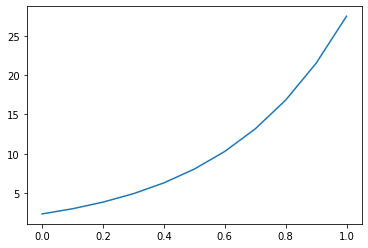

In [108]:
#k(t) эмпирическое
k_t_empir = []
for i in range(len(t)):
  k_t_empir.append(b * math.exp(a * t[i]))

plt.plot(t, k_t_empir)

In [109]:
#Коэффициент детерминации
#R2 = (sum(np.array(k_t_empir) - np.mean(np.array(k_t)))**2)/(sum(np.array(k_t) - np.mean(np.array(k_t)))**2)
print(r2_score(k_t, k_t_empir))


0.9067975025259528


### Вернёмся к первоначальному уравнению x'=k(t)f(t)

Если решать вручную:
 dx/dt=k(t)*f(t)
 dx=k(t)*f(t)*dt
 dx=b*exp(at)*(p*(t**m)+q*(t**n)+r)*dt
 dx=b*exp(at)*p*(t**m) + b*exp(at)*q*(t**n) + b*exp(at)*r
Оба интеграла, имеющие экспаненту и многочлен, решаются по частям.
### В итоге получим аналитическим способом найденное уравнение:
### x(t)=bp exp(at) ((t^2)/a - 2t/a^2 + 2/a^3) + bq exp(at)/a + br exp(at) / a + CONST
В дальнейшем значение CONST будет игнорироваться...

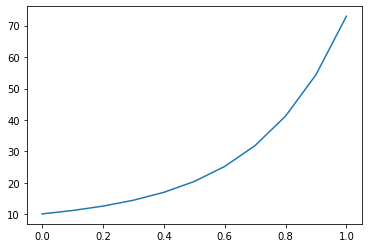

In [110]:
#Вычисление значений функции, найденной аналитическим путём x(t)
x_t = []
for i in range(len(t)):
  x_t.append(5+(b*p*math.exp(a*t[i]))*(((t[i]*t[i])/a) - ((m*t[i])/(a*a)) + (m/(a*a*a))) + ((b*q*math.exp(a*t[i]))/a) + ((b*r*math.exp(a*t[i]))/a))
#В значениях x(t0) не хватает прибавить какую-нибудь константу
plt.plot(t, x_t)

### Поиск x(t) численным методом

In [119]:
def fun(t0):
  return (b*math.exp(a*t0) * (p*(t0**float(m)) + q*t0 + r))

def gen_t(h):
  xx = []
  i = 0.0
  while(i <= 1):
    xx.append(i)
    i += h
  if(xx[len(xx) - 1] < 0.99999):
     xx.append(1)
  return xx

def accuracy(x1, x2):
  vv = []
  max_ = -1.0
  size_x = 0

  if((2*len(x1)) > len(x2)):
    size_x = len(x1) - 1
  else:
    size_x = len(x1)

  for i in range(size_x):
    vv.append(abs(x1[i] - x2[2 * i]))
    if(max_ < vv[i]):
      max_ = vv[i]
  vv = []
  return max_

def Eiler(x):
  x1 = []
  x2 = []
  t1 = []
  t2 = []
  h0 = 0.1
  n = 10
  eps = 0.1

  t1 = gen_t(h0)
  x1.append(x[0])

  for i in range(1,11):
    x1.append(x1[i - 1] + h0 * fun(t1[i - 1]))

  while(1):
    n *= 2.0
    h0 = 1.0 / n

    t2 = gen_t(h0)
    x2.append(x[0])
    for i in range(1, len(t2)):
      x2.append(x2[i - 1] + h0 * fun(t2[i - 1]))

    acc = accuracy(x1, x2)
    if(eps > acc):
      return t2, x2
    
    x1 = []
    t1 = []
    x1 = x2
    t1 = t2
    x2 = []
    t2 = []

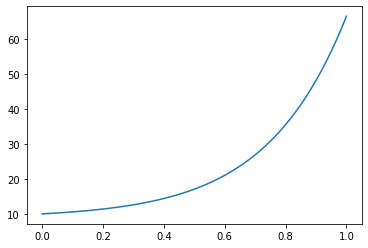

In [120]:
#Получим модель с помощью метода Эйлера
t_num, x_num = Eiler(x_t)
#print(t_num, '\n', x_num)
plt.plot(t_num, x_num)

In [121]:
#Сделаем так, чтобы величины выборок x_реал и x_эйлера были равны
x_tnum = []
for i in range(len(t_num)):
  x_tnum.append((b*p*math.exp(a*t_num[i]))*(((t_num[i]*t_num[i])/a) - ((m*t_num[i])/(a*a)) + (m/(a*a*a))) + ((b*q*math.exp(a*t_num[i]))/a) + ((b*r*math.exp(a*t_num[i]))/a))

print(r2_score(x_tnum, x_num))

0.9741908414779321


### Проверка адекватности полученной модели

Критерий Хи-квадрат

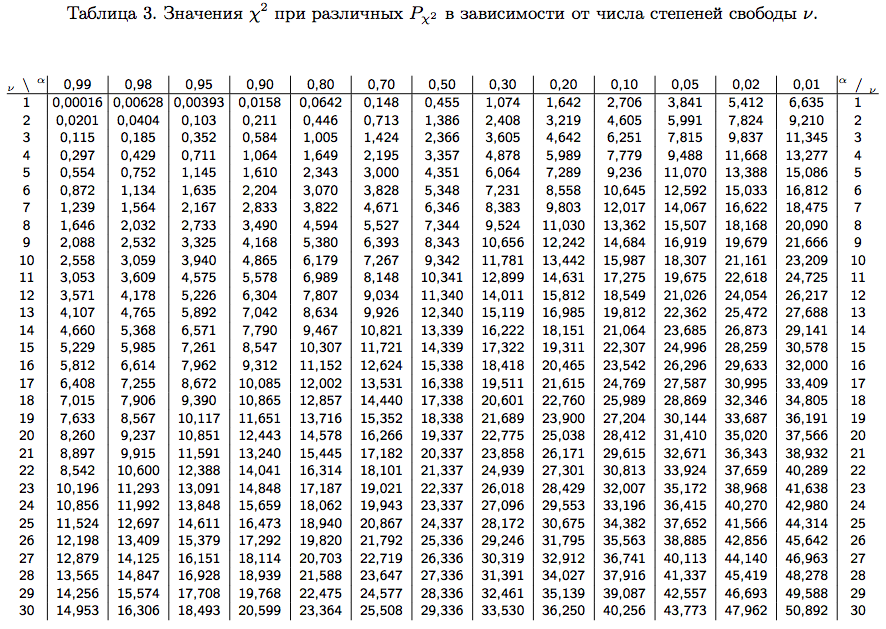

In [128]:
#Предположим, что p = 0.8, тогда q = 0.2
p_khi = 0.8
q_khi = 0.2
eps = 0.001
alfa = 0.05
v1 = 0.0 #количество выполнившихся случаев
v2 = 0.0 #количество не выполнившихся случаев

w_real = x_tnum
w_model = x_num
Ei = []

for i in range(len(t_num)):
  Ei.append(abs(w_model[i] - w_real[i]))
  if(Ei[i] < eps):
    v1 += 1
  else:
    v2 += 1

print(v1, len(t_num) * p_khi)
print(v2, len(t_num) * q_khi)

0.0 1024.8
1281.0 256.2


In [129]:
#Вычисляем значение U, чтобы выяснить адекватность модели
U = (((v1 - (len(t_num) * p_khi))**2) / (len(t_num) * p_khi)) + (((v2 - (len(t_num) * q_khi))**2) / (len(t_num) * q_khi))
print(U)

5124.0


In [130]:
#При alfa = 0.05
Xi2 = 3.841
print("Утверждение, что модель адекватна: ", (U<Xi2))

Утверждение, что модель адекватна:  False


Критерий Колмогорова-Смирнова

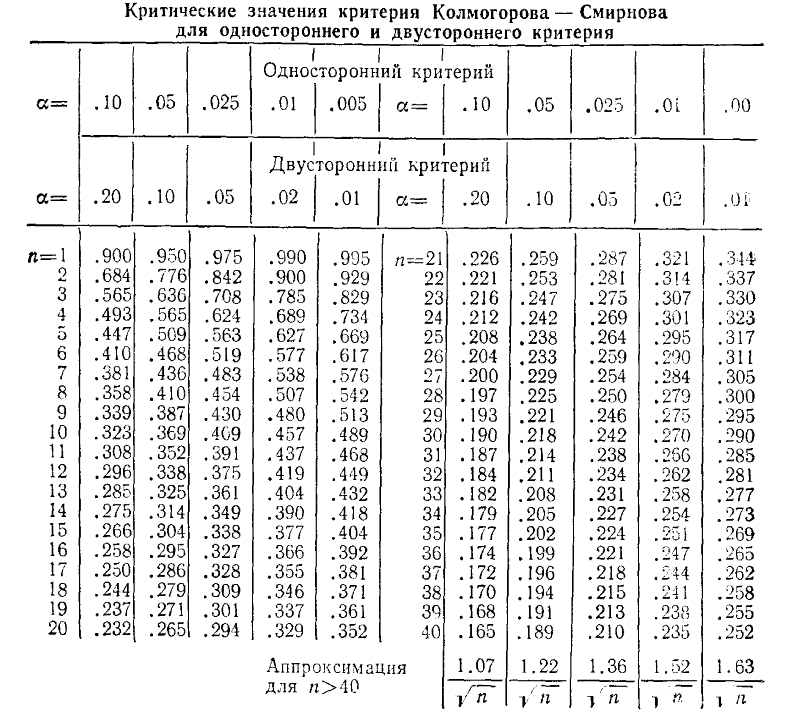

In [131]:
n = len(t_num)
alfa = 0.05
S = max(Ei)
llambda = S * (math.sqrt(n))
cc = 1.22 / math.sqrt(n)
#при n > 0 ??
print(cc, llambda)
#Чем больше lambda, тем больше модель отличается от реальной

0.03408672412985387 178.95530168173275
